# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Putu Padmanaba
- **Email:** naba17092004@gmail.com
- **ID Dicoding:** Putu Padmanaba

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana total penjualan dari waktu ke waktu?
- Pertanyaan 2 : Produk apa saja yang penjualannya tertinggi dan terendah?
- Pertanyaan 3 : Apakah keterlambatan mempengaruhi rating produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.image as mpimg
import urllib

## 1. Data Wrangling

### 1.1 Gathering Data

In [2]:
customer_df = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo_df = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payemt = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payemt.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_df = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_translation = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/product_category_name_translation.csv')
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_df = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/products_dataset.csv')
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
sellers_df = pd.read_csv('/kaggle/input/analisisdatadicoding/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
data_list = {'orders': order_df,
        'items': order_items,
        'products': product_df,
        'payments': order_payemt,
        'reviews': order_reviews,
        'customers': customer_df,
        'sellers': sellers_df,
        'geo': geo_df,
        'category': product_translation}

**Insight:**
- Setiap dataset saling memiliki keterhubungan sehingga nantinya bisa dicari keterkaitan/hubungan antar dataset yang akan membantu analisis dan visualisasi data

### 1.2 Assessing Data

1.2.1 Check datatype

In [12]:
for df_name, df in data_list.items():
    print("Data type of table", df_name)
    print('\n', data_list[df_name].info())
    print("="*70)

Data type of table orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
Data type of table items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   

1.2.2 Check missing value

In [13]:
for df_name, df in data_list.items():
    print("Data type of table", df_name)
    print('\n', data_list[df_name].isnull().sum())
    print("="*70)

Data type of table orders

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Data type of table items

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Data type of table products

 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Data type of table payments

 order_id                0
payment_sequential      0
payment_t

In [14]:
for df_name, df in data_list.items():
    print(f"Data type of table: {df_name}")
    print("\nMissing Values Percentage:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)
    print("=" * 70)


Data type of table: orders

Missing Values Percentage:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
Data type of table: items

Missing Values Percentage:
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
Data type of table: products

Missing Values Percentage:
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
produc

1.2.3 Check duplicate data

In [15]:
for df_name, df in data_list.items():
    print("Data type of table", df_name)
    print('\n', data_list[df_name].duplicated().sum())
    print("="*70)

Data type of table orders

 0
Data type of table items

 0
Data type of table products

 0
Data type of table payments

 0
Data type of table reviews

 0
Data type of table customers

 0
Data type of table sellers

 0
Data type of table geo

 261831
Data type of table category

 0


**Insight:**

- Terdapat beberapa tipe data yang masih kurang tepat, yaitu pada dataset order, items, reviews. Tipe data ini seharusnya berupa datetime tetapi pada dataset masih berupa object
- Terdapat beberapa missing value pada dataset, sehingga nantinya diperlukan proses pembersihan missing value ini.
- Terdapat duplicated data pada dataset geo

### 1.3 Cleaning Data

1.3.1 Order data

In [16]:
# Karena tiap data saling terhubung, drop missing value harus dilakukan dengan teliti, dimana jika order_id menjadi foregin key di dataset lain,
# maka data pada dataset tersebut juga harus ikut di drop
null_order = data_list['orders']['order_id'][data_list['orders']['order_delivered_customer_date'].isnull()].values

#filter untuk semua data yang ada
for key, value in data_list.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_order)].index, inplace = True)

In [17]:
#Mengubah format menjadi datetime
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_order:
  data_list['orders'][column] = pd.to_datetime(data_list['orders'][column])

1.3.2 Products

In [18]:
data_list['products']['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [19]:
data_list['products']['product_category_name'].nunique()

73

In [20]:
#drop beberapa kolom tidak penting seperti berfokus pada name length
product_drop_cols = ['product_name_lenght','product_description_lenght']
data_list['products'].drop(product_drop_cols, axis= 1, inplace= True)

In [21]:
#Pada kolom category terdapat 73 kategori, bisa diasumsikan missing value dapat diganti menjadi kategori 'others'
data_list['products']['product_category_name'].fillna(value='others', inplace=True)

/tmp/ipykernel_30/257821772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_list['products']['product_category_name'].fillna(value='others', inplace=True)


In [22]:
#Pada kolom product_photos_qty menggambarkan seberapa banyak foto yang ada mengenai produk, jika missing value bisa dianggap produk tidak memiliki
#foto
data_list['products']['product_photos_qty'].fillna(value=0, inplace=True)

/tmp/ipykernel_30/2972581133.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_list['products']['product_photos_qty'].fillna(value=0, inplace=True)


1.3.3 Reveiws

In [23]:
#Jumlah missing value pada kolom review_comment_title dan review_comment_message terbilang cukup banyak
#Karena pada proyek ini tidak akan dilakukan analisis teks, maka kolom ini akan di drop
review_drop_cols = ['review_comment_title', 'review_comment_message']
data_list['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

In [24]:
data_list['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96359 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                96359 non-null  object
 1   order_id                 96359 non-null  object
 2   review_score             96359 non-null  int64 
 3   review_creation_date     96359 non-null  object
 4   review_answer_timestamp  96359 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.4+ MB


In [25]:
#Mengubah format menjadi datetime
datetime_reviews = ["review_creation_date","review_answer_timestamp"]
for column in datetime_reviews:
  data_list['reviews'][column] = pd.to_datetime(data_list['reviews'][column])

1.3.4 Geolocation

In [26]:
# remove duplicate data
data_list['geo'].drop_duplicates(inplace=True)

1.3.5 Items

In [27]:
#Mengubah format datetime
datetime_item = ["shipping_limit_date"]
for column in datetime_item:
  data_list['items'][column] = pd.to_datetime(data_list['items'][column])

check kembali missing value

In [28]:
for df_name, df in data_list.items():
    print(f"Data type of table: {df_name}")
    print("\nMissing Values Percentage:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)
    print("=" * 70)


Data type of table: orders

Missing Values Percentage:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.014511
order_delivered_carrier_date     0.001037
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
dtype: float64
Data type of table: items

Missing Values Percentage:
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
Data type of table: products

Missing Values Percentage:
product_id               0.00000
product_category_name    0.00000
product_photos_qty       0.00000
product_weight_g         0.00607
product_length_cm        0.00607
product_height_cm        0.00607
product_width_cm         0.00607
dtype: float64
Data type of table: payments

Mis

masih ada 0,01% missing value di beberapa dataset coba tanggani missing value secara terpisah

In [29]:
null_order = data_list['orders']['order_id'][data_list['orders']['order_delivered_customer_date'].isnull()].values

#filter untuk semua data yang ada
for key, value in data_list.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_order)].index, inplace = True)

In [30]:
null_order = data_list['products']['product_id'][data_list['products']['product_weight_g'].isnull()].values

#filter untuk semua data yang ada
for key, value in data_list.items():
    if 'product_id' in value.columns:
        value.drop(value.loc[value['product_id'].isin(null_order)].index, inplace = True)

In [31]:
null_order = data_list['orders']['order_id'][data_list['orders']['order_approved_at'].isnull()].values

#filter untuk semua data yang ada
for key, value in data_list.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_order)].index, inplace = True)

In [32]:
null_order = data_list['orders']['order_id'][data_list['orders']['order_delivered_carrier_date'].isnull()].values

#filter untuk semua data yang ada
for key, value in data_list.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_order)].index, inplace = True)

In [33]:
for df_name, df in data_list.items():
    print(f"Data type of table: {df_name}")
    print("\nMissing Values Percentage:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)
    print("=" * 70)


Data type of table: orders

Missing Values Percentage:
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64
Data type of table: items

Missing Values Percentage:
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
Data type of table: products

Missing Values Percentage:
product_id               0.0
product_category_name    0.0
product_photos_qty       0.0
product_weight_g         0.0
product_length_cm        0.0
product_height_cm        0.0
product_width_cm         0.0
dtype: float64
Data type of table: payments

Missing Values Percentage:
order_id                0.0
payment_sequenti

**Insight:**
- Melakukan drop data pada dataset order
- Drop fitur tidak penting dari dataset Products serta mengganti missing value dengan nilai yang relevant
- Drop fitur tidak pending dari dataset review dimana fitur ini juga terdapat banyak missing value
- Menghapus duplikasi data pada dataset geolocation

## Exploratory Data Analysis (EDA)

### Explore Orders

In [34]:
data_list['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [35]:
data_list['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [36]:
data_list['orders'].describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [37]:
#Untuk mengetahui orders mana saja yang tepat waktu sesuai estimasi waktu yang diberikan
data_list['orders']['delivered_on_time'] = np.where(data_list['orders']['order_delivered_customer_date'] < data_list['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

In [38]:
data_list['orders']['delivered_on_time'].value_counts()

delivered_on_time
On Time    88635
Late        7826
Name: count, dtype: int64

In [39]:
data_list['orders']['order_status'].value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

### Explore Items

In [40]:
data_list['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [41]:
data_list['items'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 110162 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             110162 non-null  object        
 1   order_item_id        110162 non-null  int64         
 2   product_id           110162 non-null  object        
 3   seller_id            110162 non-null  object        
 4   shipping_limit_date  110162 non-null  datetime64[ns]
 5   price                110162 non-null  float64       
 6   freight_value        110162 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.7+ MB


In [42]:
data_list['items'].describe()

,order_item_id,shipping_limit_date,price,freight_value
count,110162.000000,110162,110162.000000,110162.000000
mean,1.198226,2018-01-08 18:34:42.855730944,119.973754,19.949474
min,1.000000,2016-09-19 23:11:33,0.850000,0.000000
25%,1.000000,2017-09-21 15:28:39.750000128,39.900000,13.080000
50%,1.000000,2018-01-26 21:11:27,74.900000,16.260000
75%,1.000000,2018-05-10 20:30:44.500000,134.170000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.706772,NaN,182.239132,15.700297


### Explore Sellers

In [43]:
data_list['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [44]:
data_list['sellers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
data_list['sellers']['seller_city'].value_counts().head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

In [46]:
data_list['sellers']['seller_state'].value_counts().head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64

### Explore Products

In [47]:
data_list['products'].head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0


In [48]:
#Karena nama produk kurang familer, kira gunakan data category yang mengandung translasi dari nama produk
product_df = pd.merge(
    left=data_list['products'],
    right=data_list['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0,housewares


In [49]:
product_df.describe()

,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,2.148502,2276.472488,30.815078,16.937661,23.196728
std,1.745738,4282.038731,16.914458,13.637554,12.079047
min,0.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,700.000000,25.000000,13.000000,20.000000
75%,3.000000,1900.000000,38.000000,21.000000,30.000000
max,20.000000,40425.000000,105.000000,105.000000,118.000000


In [50]:
product_df.duplicated().sum()

0

In [51]:
product_df['product_category_name_english'].value_counts().head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: count, dtype: int64

In [52]:
#Karena nama produk kurang familer, kira gunakan data category yang mengandung translasi dari nama produk
product_df = pd.merge(
    left=product_df,
    right=data_list['items'],
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [53]:
product_df.groupby(by='product_category_name_english').agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4092   5.00  2428.00
toys                              3804   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### Explore Customers

In [54]:
data_list['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [55]:
data_list['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [56]:
data_list['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Payment

In [57]:
data_list['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [58]:
data_list['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

### Explore Review

In [59]:
data_list['reviews'].head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


In [60]:
data_list['reviews']['review_score'].value_counts()

review_score
5    57051
4    18983
1     9409
3     7961
2     2940
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Merge semua data

In [61]:
orders_reviews = data_list['orders'].merge(data_list['reviews'], on="order_id", how="left")
orders_items_reviews = orders_reviews.merge(data_list['items'], on="order_id", how="left")
orders_items_reviews_products = orders_items_reviews.merge(data_list['products'], on="product_id", how="left")
full_data = orders_items_reviews_products.merge(data_list['customers'], on="customer_id", how="left")
full_data = full_data.merge(data_list['payments'], on="order_id", how="left")
full_data = full_data.merge(data_list['sellers'], on="seller_id", how="left")
full_data = full_data.merge(data_list['category'], on="product_category_name", how="left")
full_data = pd.merge(
        left=full_data,
        right=data_list['geo'],
        how="left",
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix"
)
full_data = full_data.drop_duplicates(subset='order_id')

In [62]:
#Compress agar ukuran tidak terlalu besar
full_data.to_csv('all_data.csv.gz', index=False, compression='gzip')

In [63]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 12099559
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   delivered_on_time              96461 non-null  object        
 9   review_id                      95815 non-null  object        
 10  review_score                   95815 non-null  float64       
 11  review_creation_d

### Pertanyaan 1: Bagaimana total penjualan dari waktu ke waktu?

In [64]:
timeseries = full_data[full_data['order_status'] == 'delivered']
timeseries = timeseries.resample(rule='D', on = 'order_approved_at').agg({
    'order_id' : 'nunique',
    'payment_value' : 'sum'
})

timeseries = timeseries.reset_index()
timeseries.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

timeseries['year_month'] = timeseries['order_approved_at'].dt.to_period('M')

In [65]:
timeseries

,order_approved_at,order_count,revenue,year_month
0,2016-09-15,1,0.00,2016-09
1,2016-09-16,0,0.00,2016-09
2,2016-09-17,0,0.00,2016-09
3,2016-09-18,0,0.00,2016-09
4,2016-09-19,0,0.00,2016-09
...,...,...,...,...
709,2018-08-25,81,10068.00,2018-08
710,2018-08-26,70,11365.99,2018-08
711,2018-08-27,64,6408.56,2018-08
712,2018-08-28,56,5699.92,2018-08


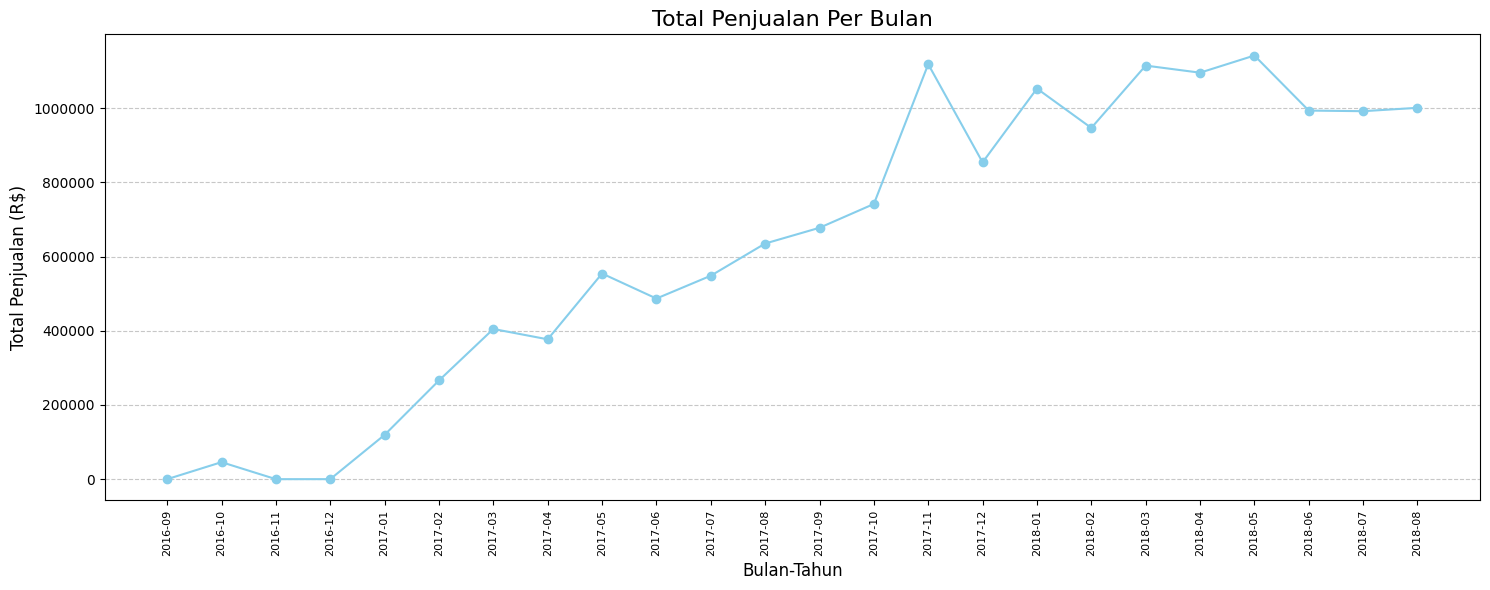

In [66]:
# Visualisasi
sales_per_month = timeseries.groupby('year_month')['revenue'].sum().reset_index()
sales_per_month['year_month'] = sales_per_month['year_month'].astype(str)
plt.figure(figsize=(15, 6))
plt.plot(sales_per_month['year_month'], sales_per_month['revenue'], marker='o', color='skyblue')
plt.title('Total Penjualan Per Bulan', fontsize=16)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Total Penjualan (R$)', fontsize=12)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Produk apa saja yang penjualannya tertinggi dan terendah?

In [67]:
top_products = full_data.groupby("product_category_name_english")["payment_value"].sum().reset_index()
top_products = top_products.rename(columns={"payment_value": "total_sales"})
top_products = top_products.sort_values(by="total_sales", ascending=False)

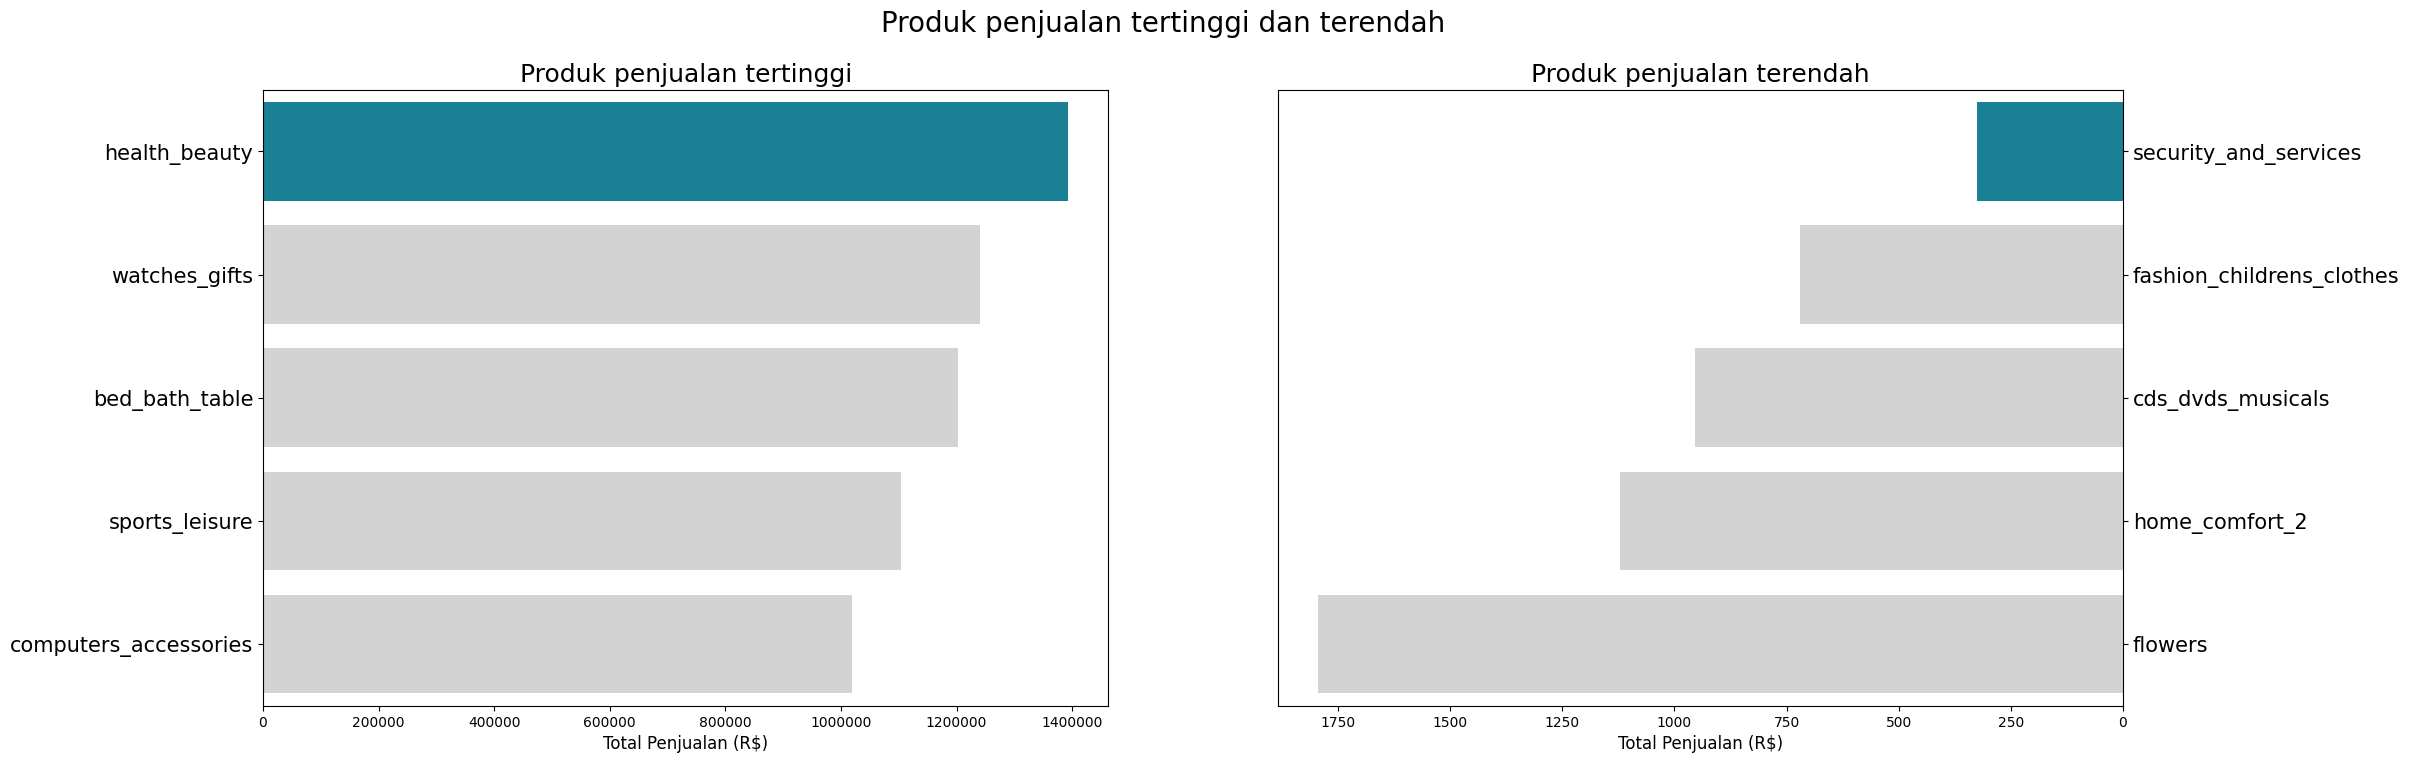

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_sales", y="product_category_name_english", data=top_products.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk penjualan tertinggi", loc="center", fontsize=18)
ax[0].ticklabel_format(axis='x', style='plain')
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xlabel('Total Penjualan (R$)', fontsize=12)

sns.barplot(x="total_sales", y="product_category_name_english", data=top_products.sort_values(by="total_sales", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk penjualan terendah", loc="center", fontsize=18)
ax[1].ticklabel_format(axis='x', style='plain')
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xlabel('Total Penjualan (R$)', fontsize=12)

plt.suptitle("Produk penjualan tertinggi dan terendah", fontsize=20)
plt.show()

### Pertanyaan 3: Apakah keterlambatan mempengaruhi rating produk?

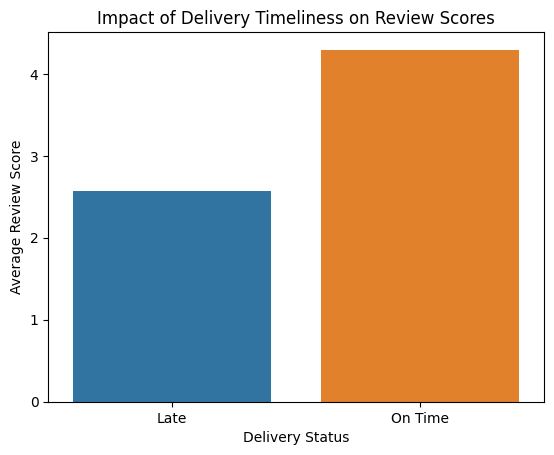

In [69]:
average_scores = full_data.groupby("delivered_on_time")["review_score"].mean().reset_index()
sns.barplot(data=average_scores, x="delivered_on_time", y="review_score")
plt.title("Impact of Delivery Timeliness on Review Scores")
plt.xlabel("Delivery Status")
plt.ylabel("Average Review Score")
plt.show()


**Insight:**
- Pendapatan dari bulan september 2016 hingga agustus 2018 mengalami kenaikan yang stabil. Selain itu, puncak pendapatan terjadi pada bulan november 2017
- Dari hasil visualisasi, didapatkan beberapa produk dengan penjualan tertinggi dan terendah. Produk dengan penjualan tertinggi, yaitu health beauty, watches gifts, bed bath table, sports leisure, dan computer accessories. Sementara untuk produk dengan penjualan terendah, yaitu security and services, fashin childern clothes, cds dvds musicals, home comfort, dan flowers.
- Selain itu, dari visualisasi kita juga mendapat infomasi bahwa keterlambatan pengiriman produk berpengaruh terhadap rating yang diberikan oleh customer. Bisa dilihat, raa-rata rating untuk produk yang terlambar dikisaran 2.7, sementara untuk produk yang tidak terlambat ratingnya berada diatas 4.

## Analisis Lanjutan

### GeoLocation

In [70]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

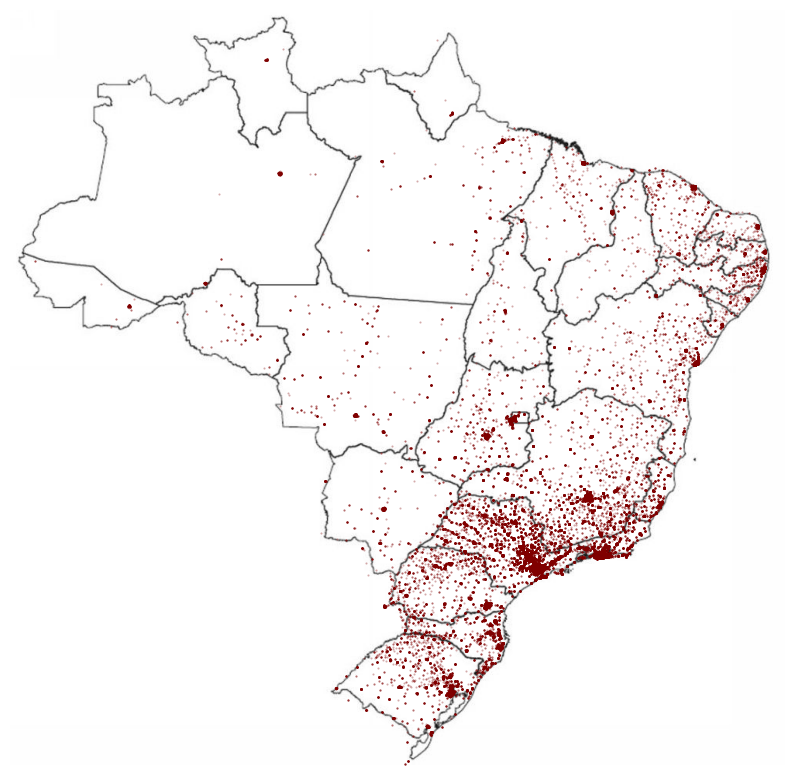

In [71]:
plot_brazil_map(full_data.drop_duplicates(subset='customer_id'))

## Conclusion

- Selama periode dari September 2016 hingga Agustus 2018, pendapatan menunjukkan kenaikan yang stabil setiap bulannya. Hal ini mencerminkan pertumbuhan bisnis yang konsisten dalam rentang waktu tersebut. Puncak pendapatan tercatat pada November 2017, yang kemungkinan disebabkan oleh event besar, seperti winter sale atau black friday. Temuan ini memberikan peluang bagi perusahaan untuk merencanakan strategi pemasaran serupa di bulan yang sama pada tahun mendatang.
- Hasil analisis menunjukkan bahwa kategori produk seperti health beauty, watches gifts, bed bath table, sports leisure, dan computer accessories menjadi produk dengan penjualan tertinggi. Produk-produk ini kemungkinan besar memiliki daya tarik yang kuat di kalangan konsumen karena fungsionalitas atau popularitasnya. Sebaliknya, kategori produk seperti security and services, fashion children clothes, cds dvds musicals, home comfort, dan flowers memiliki penjualan yang lebih rendah. Hal ini bisa menjadi indikator bahwa produk-produk tersebut memiliki permintaan yang terbatas atau strategi pemasaran yang kurang efektif. Perusahaan dapat menggunakan informasi ini untuk mengalokasikan sumber daya dengan lebih optimal atau mengembangkan strategi khusus untuk meningkatkan penjualan kategori dengan performa rendah.
- Dari hasil visualisasi, terlihat bahwa keterlambatan pengiriman secara signifikan mempengaruhi kepuasan pelanggan, yang tercermin pada penilaian rating. Produk yang terlambat rata-rata memiliki rating sekitar 2.7, sedangkan produk yang dikirim tepat waktu memiliki rating di atas 4. Hal ini menunjukkan bahwa kecepatan pengiriman adalah faktor kunci dalam menjaga kepuasan pelanggan. Oleh karena itu, perusahaan perlu meningkatkan efisiensi logistik untuk meminimalkan keterlambatan pengiriman. Strategi seperti kerja sama dengan mitra pengiriman yang lebih andal atau menyediakan opsi pengiriman yang lebih cepat dapat membantu mengatasi masalah ini.
- Analisis distribusi geografis menunjukkan bahwa sebagian besar pelanggan berada di wilayah Brasil bagian selatan, tenggara, dan timur. Wilayah-wilayah ini mencakup kota-kota besar dengan populasi tinggi dan aktivitas ekonomi yang lebih intensif, yang kemungkinan menjadi faktor pendorong tingginya permintaan di daerah tersebut. Temuan ini memberikan wawasan penting bagi perusahaan untuk mengarahkan strategi pemasaran yang lebih terfokus ke wilayah ini, misalnya dengan menyediakan kampanye promosi lokal atau fasilitas logistik tambahan untuk mempercepat pengiriman.

In [72]:
!pip freeze > requirements.txt